# Exploration of NetworkX and Other Graph Neural Network Libraries

In [87]:
# Import relevant libraries
import networkx as nx
import matplotlib.pyplot as plt


In [75]:
G = nx.Graph()   # Initialize an empty graph G

## Adding Nodes to Graph

In [76]:
# Different Methods to add nodes

# Add single node
G.add_node("node1")                 # Add node with name "node1"
G.add_node("node2", index = 5)      # Add node with name "node2", with node attribute index = 5. Attribute key can be anything
G.add_node(5, gtl_name = "teck", sex = 'male')     # Add node with name 5, with 2 attributes

# Add multiple nodes (any iterable container works)
G.add_nodes_from([6,  7])            # Add nodes 6 and 7 
G.add_nodes_from({8,  9})             # Add nodes 8 and 9
G.add_nodes_from((10, 11))           # Add nodes 10 and 11

# Add multiple nodes with attributes - can only use list container else error
G.add_nodes_from([('dict_node1' , {'first_att': 'red', \
                                  'sec_att': 5}), \
                   (12, {'string_type': 'int',\
                        'what': 10})])

In [77]:
H = nx.Graph()
H.add_nodes_from([("Hnode1", {'att1': 'peace', 'att2': 'war'}), ("Hnode2", {'att1': 'fighting', 'att2': 'loving'})])
H.nodes.data()

NodeDataView({'Hnode1': {'att1': 'peace', 'att2': 'war'}, 'Hnode2': {'att1': 'fighting', 'att2': 'loving'}})

In [78]:
G.nodes.data()

NodeDataView({'node1': {}, 'node2': {'index': 5}, 5: {'gtl_name': 'teck', 'sex': 'male'}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}, 'dict_node1': {'first_att': 'red', 'sec_att': 5}, 12: {'string_type': 'int', 'what': 10}})

In [79]:
# G.add_node(H)          # Adding Graph H to G in this way will make the entire graph H a node of G
G.add_nodes_from(H)      # Adding Graph H to G in this way will add nodes of Graph H to that of G. However, attributes of nodes in H seemed to be removed

In [80]:
G.nodes.data()           # Can use list(G.nodes.data()) to return a list format

NodeDataView({'node1': {}, 'node2': {'index': 5}, 5: {'gtl_name': 'teck', 'sex': 'male'}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}, 'dict_node1': {'first_att': 'red', 'sec_att': 5}, 12: {'string_type': 'int', 'what': 10}, 'Hnode1': {}, 'Hnode2': {}})

In [81]:
# G.clear()    # To clear all node, edges from Graph. 

## Adding Edges to Graph

In [82]:
# Different ways to add edge to graph
G.add_edge('node1', 'node2')         # Add edge between node1 and node2
assigned_edge = (7, 8)
G.add_edge(*assigned_edge)           # Use * to unpack the edge tuple


G.add_edges_from([(5, 6), (6, 7)])   # Add edges between nodes 5 and 6; and nodes 6 and 7
G.add_edges_from([('node2', 5, {'edge_att1': 10, 'edge_att2': 'rand'})])   # Add edge between 'node2' and 5, with 2 edge attributes
assigned_edges = [(8, 9), (9, 10), (10, 11)]
G.add_edges_from(assigned_edges)     # No need unpacking if is a list of edges to add


In [83]:
G.edges.data()

EdgeDataView([('node1', 'node2', {}), ('node2', 5, {'edge_att1': 10, 'edge_att2': 'rand'}), (5, 6, {}), (6, 7, {}), (7, 8, {}), (8, 9, {}), (9, 10, {}), (10, 11, {})])

## Examining the graph

In [84]:
print('\nNodes')
print(G.number_of_nodes())       # Check total number of nodes in Graph G
print(list(G.nodes))             # List the nodes in G

print('\nEdges')
print(G.number_of_edges())       # Check total number of edges in Graph G
print(list(G.edges))             # List the edges in G
print(list(G.edges(['node1', 'node2', 6])))             # List the edges in G

print('\nAdjacent / Neighbours')
print(list(G.adj['node2']))      # List the nodes that are adjacent to 'node2'
print(list(G.neighbors('node2')))      # List the nodes that are adjacent to 'node2'

print('\nDegree')
print(G.degree(['node2', 5, 8]))         # Check number of edges to 'node2'


Nodes
13
['node1', 'node2', 5, 6, 7, 8, 9, 10, 11, 'dict_node1', 12, 'Hnode1', 'Hnode2']

Edges
8
[('node1', 'node2'), ('node2', 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11)]
[('node1', 'node2'), ('node2', 5), (6, 5), (6, 7)]

Adjacent / Neighbours
['node1', 5]
['node1', 5]

Degree
[('node2', 2), (5, 2), (8, 2)]


## Removing elements

In [85]:
# Add nodes 12 - 15 with edges between (11, 12) and (12, 13)
G.add_node(12), G.add_edge(12,11), G.add_nodes_from([13, 14, 15]), G.add_edge(12,13)
print(G.nodes())
print(G.edges())

# Remove node 12, edges are also removed
G.remove_node(12)
print(G.nodes())
print(G.edges())

# Remove nodes 13-15
G.remove_nodes_from([13, 14, 15])
print(G.nodes())
print(G.edges())

['node1', 'node2', 5, 6, 7, 8, 9, 10, 11, 'dict_node1', 12, 'Hnode1', 'Hnode2', 13, 14, 15]
[('node1', 'node2'), ('node2', 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13)]
['node1', 'node2', 5, 6, 7, 8, 9, 10, 11, 'dict_node1', 'Hnode1', 'Hnode2', 13, 14, 15]
[('node1', 'node2'), ('node2', 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11)]
['node1', 'node2', 5, 6, 7, 8, 9, 10, 11, 'dict_node1', 'Hnode1', 'Hnode2']
[('node1', 'node2'), ('node2', 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11)]


In [86]:
G.add_node(100), G.add_edge(100,11), G.add_nodes_from([200, 214, 315]), G.add_edge(12,13)
print(G.nodes())
print(nx.convert_node_labels_to_integers(G).nodes())


['node1', 'node2', 5, 6, 7, 8, 9, 10, 11, 'dict_node1', 'Hnode1', 'Hnode2', 100, 200, 214, 315, 12, 13]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


In [73]:
G.clear()

In [74]:
G.nodes()

NodeView(())

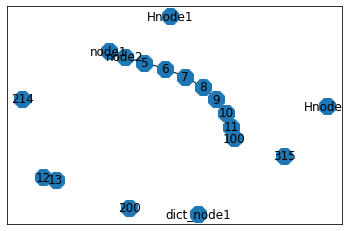

In [96]:
nx.drawing.nx_pylab.draw_networkx(G, with_labels=True, node_shape = '8')